In [1]:
%matplotlib inline
from pymc3 import *
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [2]:
d = np.genfromtxt('data/phonemes.csv', delimiter=',')

In [3]:
d = np.delete(d, (0), axis = 0)
X = d[:,range(d.shape[1]-1)]
y = d[:,d.shape[1]-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=108)

In [5]:
with Model() as model:
    beta = pm.Normal('beta', 0, sd = 1, shape = 256)
    alpha = pm.Normal('alpha', 0, sd = .01)
    p = pm.invlogit(alpha + pm.math.dot(X_train, beta))
    out = pm.Bernoulli('y', p= p, observed = y_train, total_size=y_train.shape[0])    
    
with model:
    start = pm.find_MAP(model = model)
    t1 = pm.sample(1000, njobs=1, start = start)

Optimization terminated successfully.
         Current function value: 282.313794


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 18,633:   0%|          | 258/200000 [00:00<01:17, 2573.44it/s]
Convergence archived at 400
Interrupted at 400 [0%]: Average Loss = 17,649
100%|██████████| 1500/1500 [08:25<00:00,  2.24it/s]/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:465: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)
/Users/alfredogarbuno/anaconda2/envs/py2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:473: UserWarning: Chain 0 contains 5 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))


         Iterations: 291
         Function evaluations: 297
         Gradient evaluations: 297


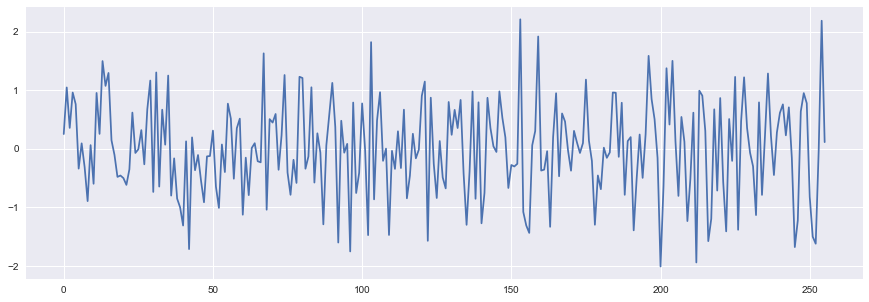

In [6]:
plt.figure(figsize=(15, 5));
plt.plot(np.arange(256), t1[500:]['beta'].mean(axis=0));

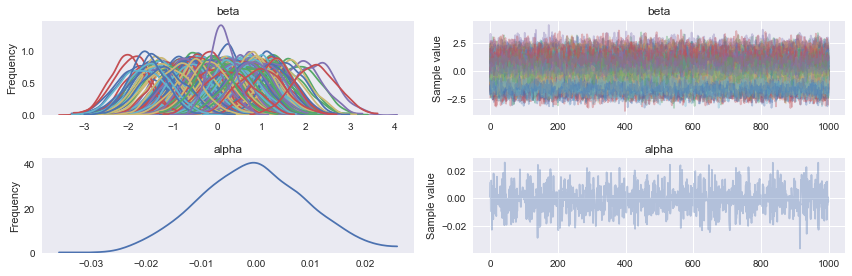

In [7]:
pm.plots.traceplot(t1);

# Scaling the features

In [8]:
# Scaling first 
X = scale(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=108)

In [10]:
with Model() as model:
    beta = pm.Normal('beta', 0, sd = 1, shape = 256)
    alpha = pm.Normal('alpha', 0, sd = .01)
    p = pm.invlogit(alpha + pm.math.dot(X_train, beta))
    
    out = pm.Bernoulli('y', p= p, observed = y_train, total_size=y_train.shape[0])  
    
with model:
    start = pm.find_MAP(model = model)
    t4 = pm.sample(1000, njobs=1, start = start)

Optimization terminated successfully.
         Current function value: 550.436955
         Iterations: 137

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 47,998:   8%|▊         | 15714/200000 [00:09<01:50, 1671.02it/s]
Convergence archived at 15800
Interrupted at 15,800 [7%]: Average Loss = 23,870
100%|██████████| 1500/1500 [01:18<00:00, 23.75it/s]



         Function evaluations: 146
         Gradient evaluations: 146


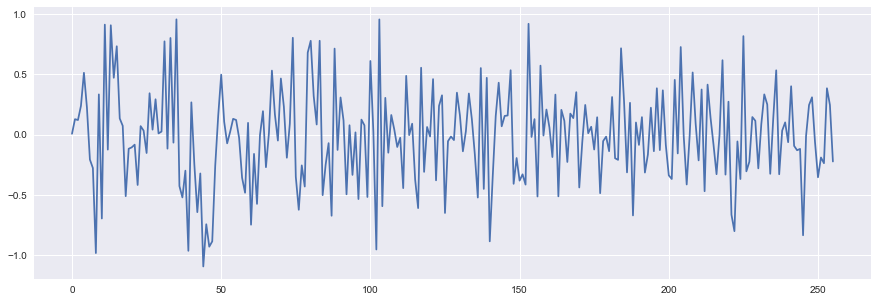

In [11]:
plt.figure(figsize=(15, 5));
plt.plot(np.arange(256), t4[500:]['beta'].mean(axis=0));

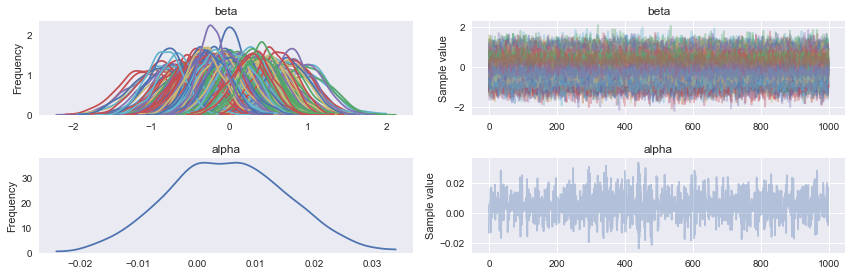

In [12]:
pm.plots.traceplot(t4);

In [13]:
with Model() as model:
    beta = pm.Normal('beta', 0, sd = .01, shape = 256)
    alpha = pm.Normal('alpha', 0, sd = .01)
    p = pm.invlogit(alpha + pm.math.dot(X_train, beta))
    out = pm.Bernoulli('y', p= p, observed = y_train, total_size=y_train.shape[0])    
    
with model:    
    start = pm.find_MAP(model = model)
    t5 = pm.sample(1000, njobs=1, start = start)

         Current function value: -247.745987
         Iterations: 127
         Function evaluations: 383
         Gradient evaluations: 371


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 3.7394e+05:   8%|▊         | 15551/200000 [00:09<01:53, 1629.29it/s]
Convergence archived at 15600
Interrupted at 15,600 [7%]: Average Loss = 4.6383e+05
100%|██████████| 1500/1500 [03:34<00:00,  2.94it/s]


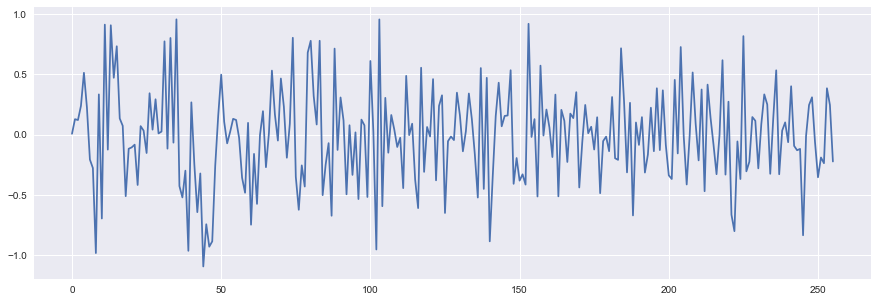

In [14]:
plt.figure(figsize=(15, 5));
plt.plot(np.arange(256), t4[500:]['beta'].mean(axis=0));

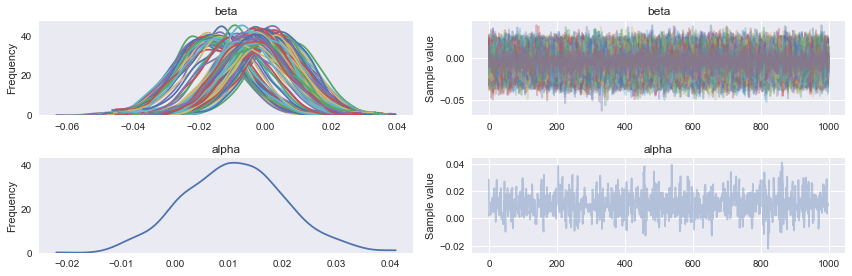

In [15]:
pm.plots.traceplot(t5);

# Using a spline regularizer

In [16]:
X = d[:,range(d.shape[1]-1)]
y = d[:,d.shape[1]-1]

In [17]:
H = np.genfromtxt('data/spline_basis.csv', delimiter=',')
H = np.delete(H, (0), axis = 0)

In [18]:
Xp = np.matmul(X,H)
Xp[0,]

array([ 363.62900733,  310.81605613,  254.24657361,  201.94481537,
        187.03474645,  163.78448703,  154.1995795 ,  154.65131925,
        159.26636235,   38.5680388 ,  356.43309022, -137.5749926 ])

In [19]:
Xp = np.genfromtxt('data/spline_data.csv', delimiter=',')
Xp = np.delete(Xp, (0), axis = 0)

In [20]:
Xp_train, Xp_test, y_train, y_test = train_test_split(Xp, y, test_size=0.33, random_state=108)

In [21]:
with Model() as model:
    beta = pm.Normal('beta', 0, sd = 1e3, shape = 12)
    alpha = pm.Normal('alpha', 0, sd = 1e3)
    p = pm.invlogit(alpha + pm.math.dot(Xp_train, beta))
    
    out = pm.Bernoulli('y', p= p, observed = y_train, total_size=y_train.shape[0])  

In [22]:
with model:
    start = pm.find_MAP(model = model)
    t7 = pm.sample(2000, njobs=1, start = start)

         Current function value: 554.122614
         Iterations: 29
         Function evaluations: 83


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
  0%|          | 0/200000 [00:00<?, ?it/s]
Convergence archived at 200
Interrupted at 200 [0%]: Average Loss = 1.23e+05
100%|██████████| 2500/2500 [05:14<00:00,  6.14it/s]

         Gradient evaluations: 72


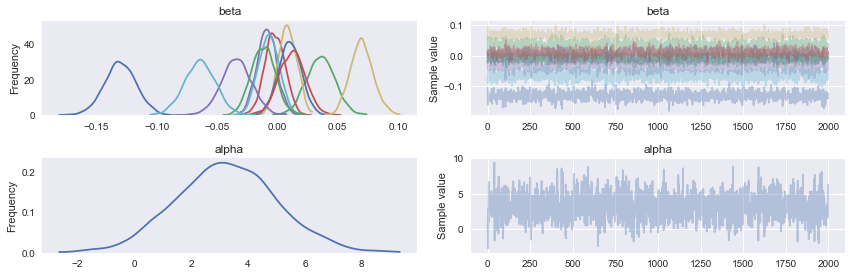

In [23]:
pm.plots.traceplot(t7);

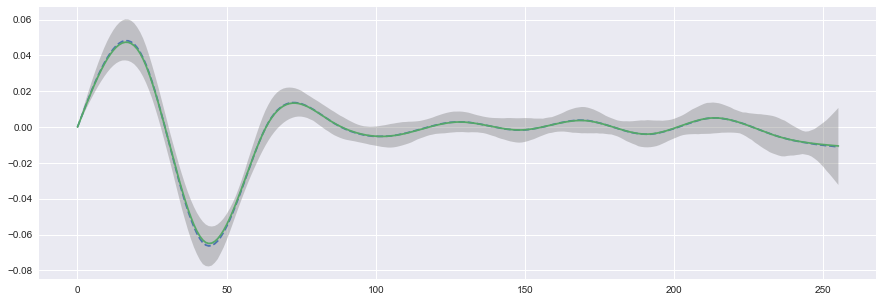

In [24]:
C = np.matmul(t7['beta'], H.T)
C = np.percentile(C, [2.5, 50, 97.5], axis = 0)
Cmap = np.matmul(start['beta'], H.T)
plt.figure(figsize=(15, 5));
plt.fill_between(np.arange(256), C[0], C[2], facecolor='gray', alpha = 0.4, zorder = 1);
plt.plot(np.arange(256), C[1,].T, label = 'Median', linestyle = '--', zorder = 2);
plt.plot(np.arange(256), Cmap.T);